# Privacy on NLP models (Hallmarks of Cancer dataset)

## Imports

In [1]:
#nlp
from datasets import Dataset, DatasetDict, Value
import xgboost as xgb

#personal py files
import utils
import hoc
import mem
import extr
import mia
import dp
import fed
import energy
import training

#general utils
import pandas as pd
from time import perf_counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import seaborn as sns

#verbosity
import transformers
import datasets
datasets.logging.set_verbosity_error()
transformers.logging.set_verbosity_error()
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

/home/gberthelier/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


No Bottleneck unit testing available.


/home/gberthelier/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:64: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


In [2]:
#for reproducible results
seed = 40
node = "taurus-4"
site = "lyon"

#check current dir
import os
print("Current dir :",os.getcwd())

Current dir : /home/gberthelier/hoc


In [3]:
#time start
T1 = perf_counter()

## Dataset & memorization

Building dataset


  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/854 [00:00<?, ?ex/s]

--------------
Num rows :  854
Columns :  ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask']
Unique labels :  [0 1 2 3 5 6 7 8 9]
Useful columns :  ['label', 'input_ids', 'token_type_ids', 'attention_mask']
Shapes :  [torch.Size([854]), torch.Size([854, 512]), torch.Size([854, 512]), torch.Size([854, 512])]
Truncated 63 sequences
Mean number of word :  240
Mean number of unique words :  128
Mean number of characters :  1515
Accs :  0.76791


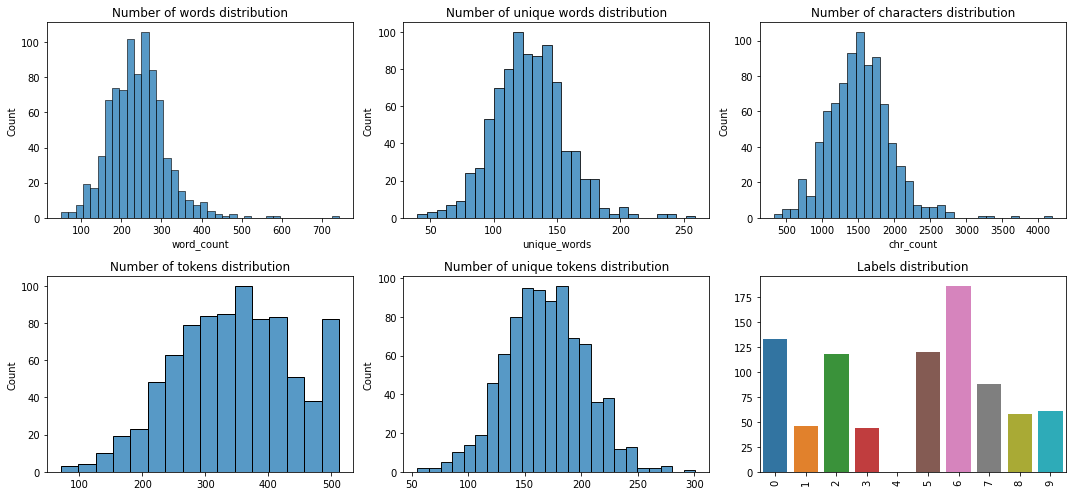

<Figure size 432x288 with 0 Axes>

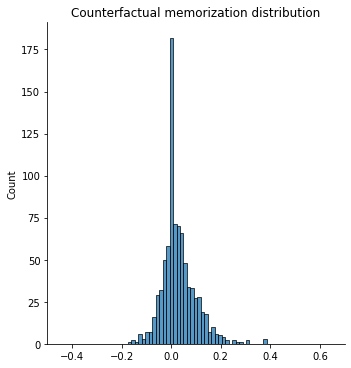

Number of counterfactuals for threshold : 0.3 :  5
Words with mem > 0.3
-----------------
Sizes :  1728 1479 931 1599 1987
Words :  291 245 155 236 323
Unique words :  155 130 104 151 142
Labels :  ['LABEL_5', 'LABEL_6', 'LABEL_6', 'LABEL_0', 'LABEL_5']


Flattening the indices:   0%|          | 0/1 [00:00<?, ?ba/s]

In [13]:
utils.reload(hoc)
utils.reload(mem)
dataset, real_mems, tokenizer, label_dicts = hoc.get_all_hoc(seed=seed,real_t=0.3,print_graphs=True)

## Data extraction

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1552 [00:00<?, ?ex/s]

New dataset size:  1552
Dataset distribution
Mean words :  95.1
Mean unique words :  69.5
Mean tokens :  150.0
Mean unique tokens :  94.7
Potentiel counterfactuals :  25
Training size :  1401
Min length:  290
Prompt sizes :  [ 30  70 140 220]

Prompts:

Sampled prompts distribution
Mean words:  [5.4, 11.1, 20.1, 29.6]
Mean unique words:  [5.5, 11.4, 21.7, 33.6]
Mean sizes:  [30.0, 70.0, 140.0, 220.0]

Outputs:

Outputs distribution
Mean words:  [15.1, 15.2, 15.1, 15.0]
Mean unique words:  [13.9, 14.0, 13.9, 13.9]
Mean sizes:  [92.4, 93.2, 92.4, 90.3]

Extracted:

Extracted phrases distribution
Mean words:  [6.7, 5.9, 5.6, 5.8]
Mean unique words:  [6.4, 5.8, 5.5, 5.8]
Mean sizes:  [28.9, 28.9, 28.5, 28.8]

Extracted prompts distribution
Mean words:  [5.1, 11.6, 23.1, 35.8]
Mean unique words:  [5.0, 11.1, 21.5, 31.3]
Mean sizes:  [30.0, 70.3, 140.9, 221.2]

Extracted texts distribution
Mean words:  [102.2, 98.5, 96.2, 101.5]
Mean unique words:  [70.9, 69.0, 67.2, 68.6]
Mean sizes:  [662.

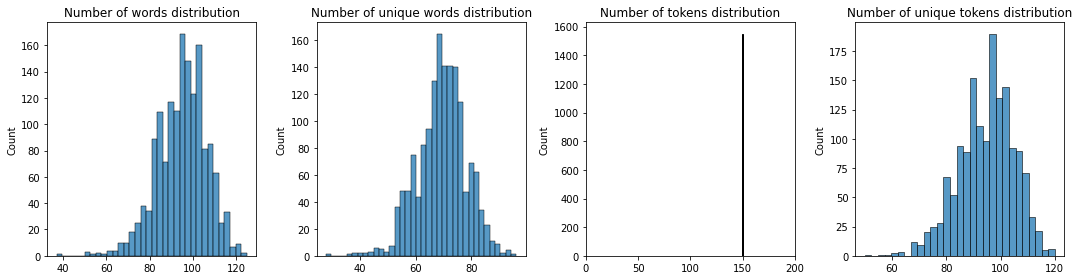

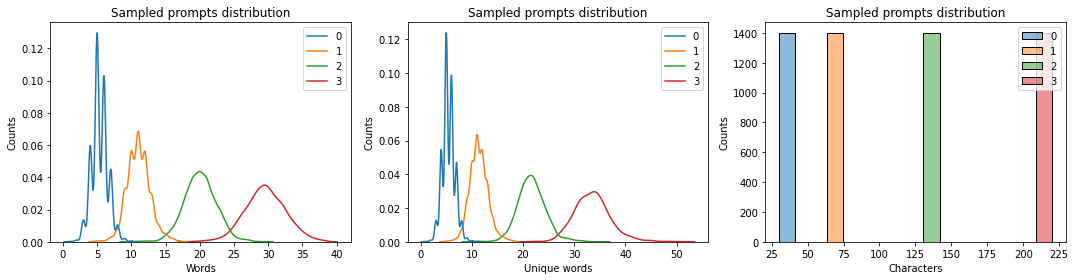

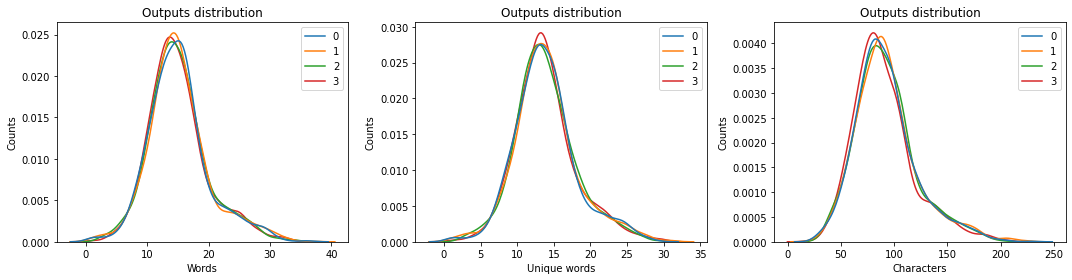

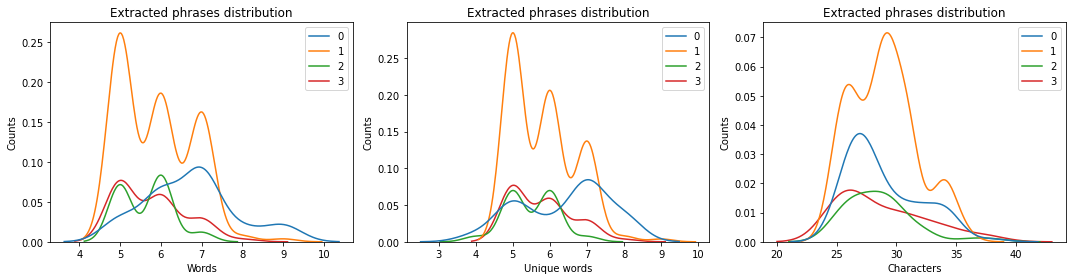

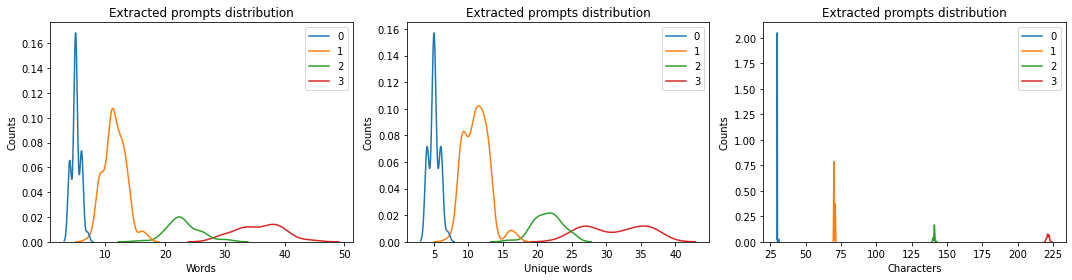

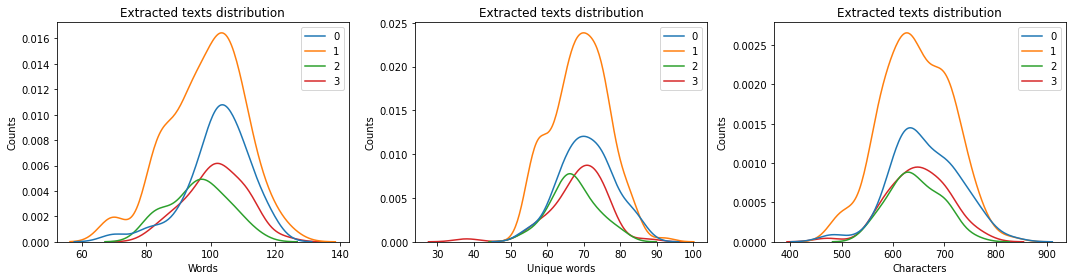

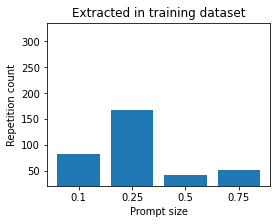

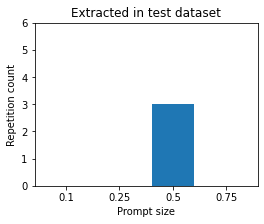

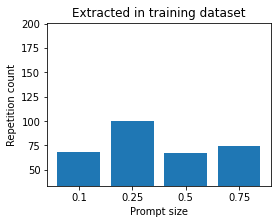

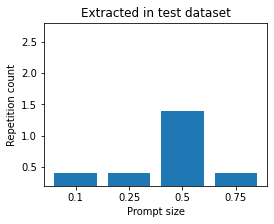

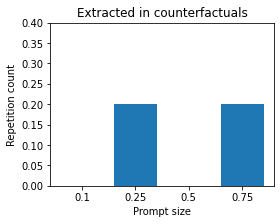

In [77]:
utils.reload(extr)
bench_sizes = [0.1,0.25,0.5,0.75]
n_trials = 5
do_compute = False

repartition_trains, repartition_tests, repartition_mems = extr.extr_grid(n_trials,dataset,real_mems,bench_sizes,seed=seed,context_length=150,do_compute=do_compute,do_training=False,max_new_tokens=20,min_size=25,min_words=7,save_dir="extr",print_graphs=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1552 [00:00<?, ?ex/s]

New dataset size:  1552
Dataset distribution
Mean words :  95.1
Mean unique words :  69.5
Mean tokens :  150.0
Mean unique tokens :  94.7
Potentiel counterfactuals :  25
Training size :  1401
Min length:  290
Prompt sizes :  [ 30  70 140 220]

Prompts:

Sampled prompts distribution
Mean words:  [5.4, 11.1, 20.1, 29.6]
Mean unique words:  [5.5, 11.4, 21.7, 33.6]
Mean sizes:  [30.0, 70.0, 140.0, 220.0]

Outputs:

Outputs distribution
Mean words:  [15.1, 15.2, 15.1, 15.0]
Mean unique words:  [13.9, 14.0, 13.9, 13.9]
Mean sizes:  [92.4, 93.2, 92.4, 90.3]

Extracted:

Extracted phrases distribution
Mean words:  [6.7, 5.9, 5.6, 5.8]
Mean unique words:  [6.4, 5.8, 5.5, 5.8]
Mean sizes:  [28.9, 28.9, 28.5, 28.8]

Extracted prompts distribution
Mean words:  [5.1, 11.6, 23.1, 35.8]
Mean unique words:  [5.0, 11.1, 21.5, 31.3]
Mean sizes:  [30.0, 70.3, 140.9, 221.2]

Extracted texts distribution
Mean words:  [102.2, 98.5, 96.2, 101.5]
Mean unique words:  [70.9, 69.0, 67.2, 68.6]
Mean sizes:  [662.

07/05/2023 09:05:58:WARNING:No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
07/05/2023 09:05:58:WARNING:No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


([82, 168, 42, 52], [0, 0, 3, 0], [0, 0, 0, 0], 1401)

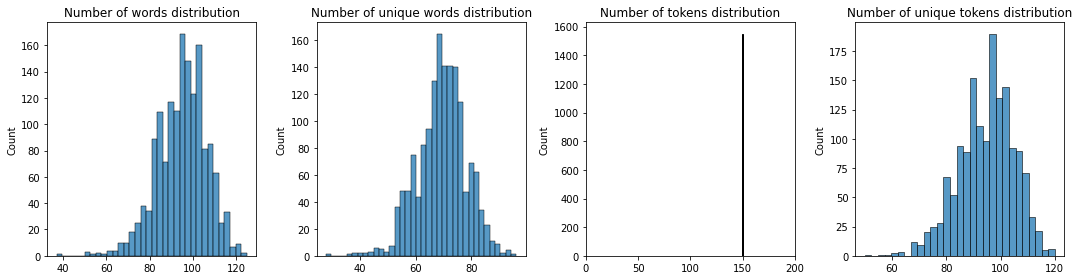

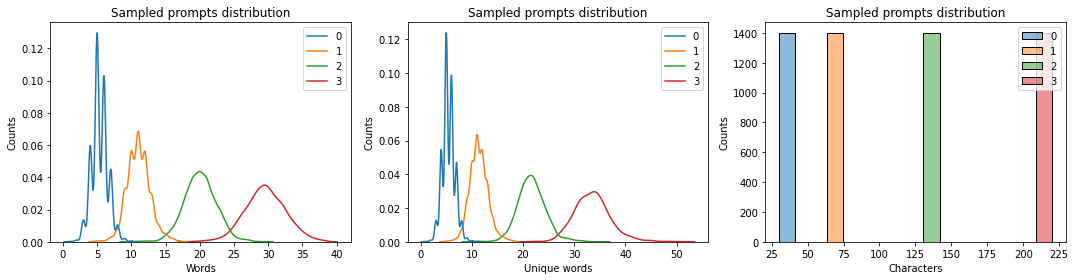

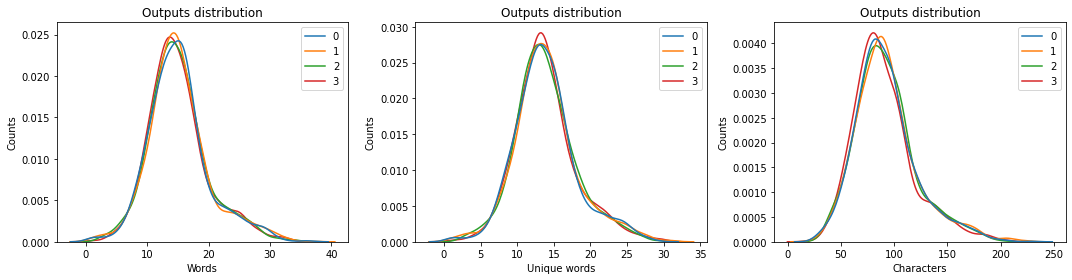

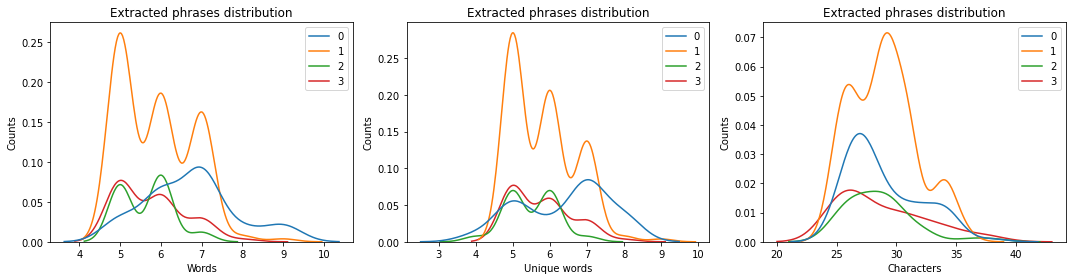

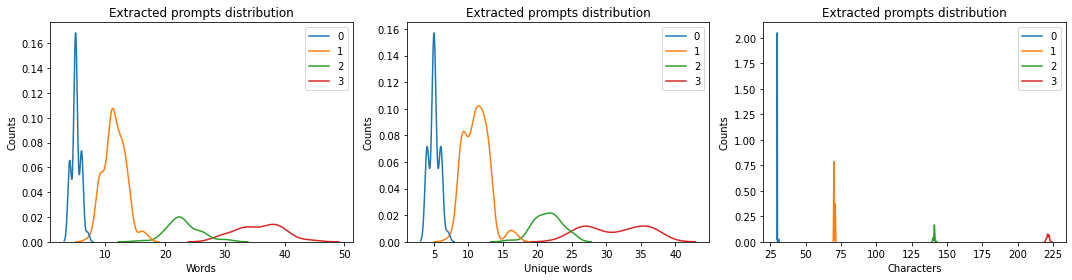

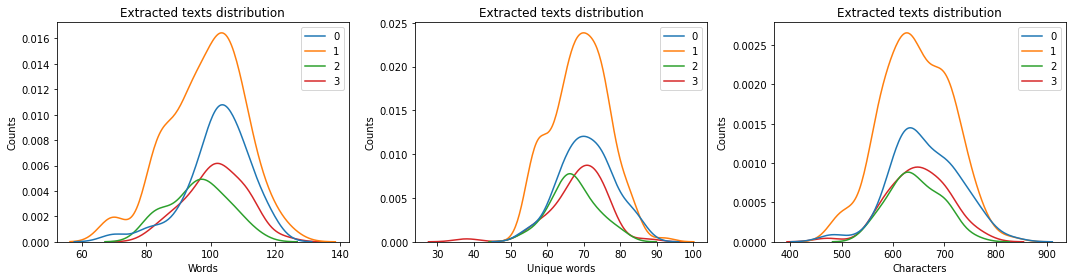

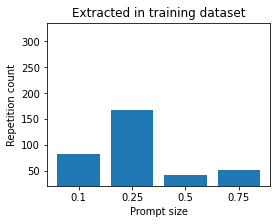

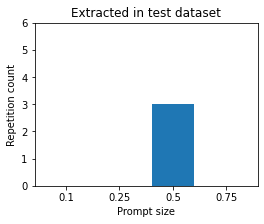

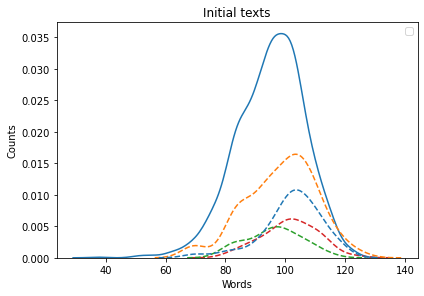

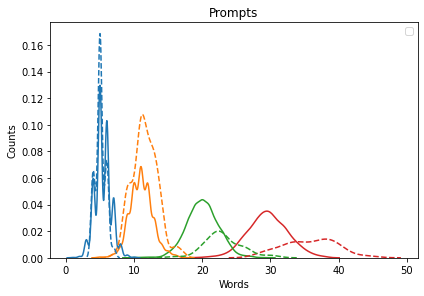

In [11]:
utils.reload(extr)
extr.extr_pipeline(dataset,real_mems,context_length=150,seed=seed,do_training=False,max_new_tokens=20,do_prompts=False,bench_sizes=[0.1,0.25,0.5,0.75],min_size=25,min_words=7,save_dir="extr",print_graphs=True,is_hcl=False,device=None)

## MIA

### Target model training (classification)

In [78]:
print("Whole dataset size: ",dataset.num_rows)
print("Train size:",dataset.filter(lambda data: data["status"]==1).num_rows)

Whole dataset size:  854


  0%|          | 0/1 [00:00<?, ?ba/s]

Train size: 430


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

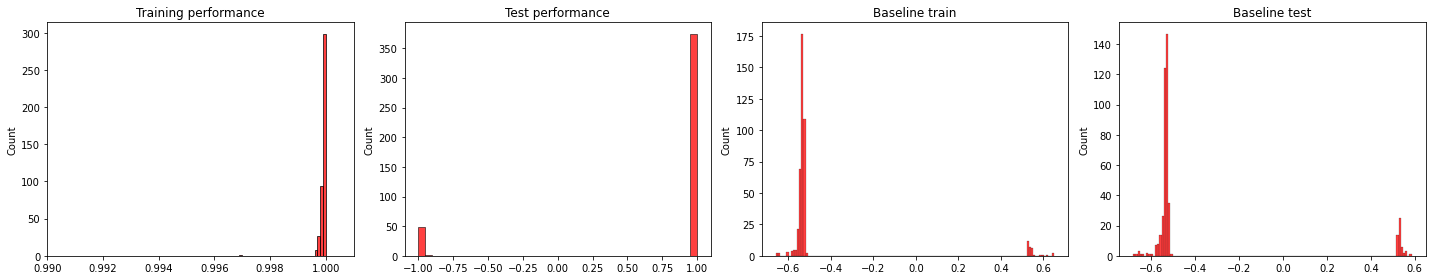

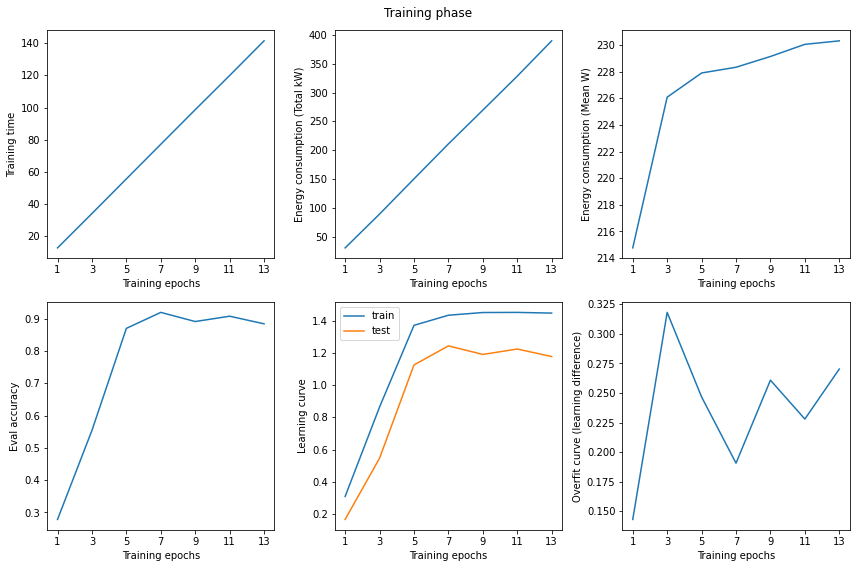

In [79]:
do_target_train = False
utils.reload(training)
epoch_bench = [1,3,5,7,9,11,13]
training.train_grid(dataset.filter(lambda data: data["status"]==1),dataset.filter(lambda data: data["status"]==0),tokenizer,epoch_bench,label_dicts,target_dir="target_model",seed=seed,compute=do_target_train,print_graphs=True,start_at=0,node=node,site=site)
target_dir = f"target_model/model_{epoch_bench[-1]}"

### Shadow mia

rebuilding dataset 0


  0%|          | 0/854 [00:00<?, ?ex/s]

rebuilding dataset 1


  0%|          | 0/854 [00:00<?, ?ex/s]

rebuilding dataset 2


  0%|          | 0/854 [00:00<?, ?ex/s]

rebuilding dataset 3


  0%|          | 0/854 [00:00<?, ?ex/s]

rebuilding dataset 4


  0%|          | 0/854 [00:00<?, ?ex/s]

rebuilding dataset 5


  0%|          | 0/854 [00:00<?, ?ex/s]

rebuilding dataset 6


  0%|          | 0/854 [00:00<?, ?ex/s]

All done


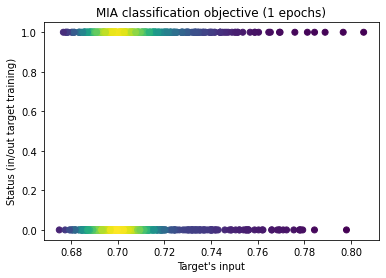

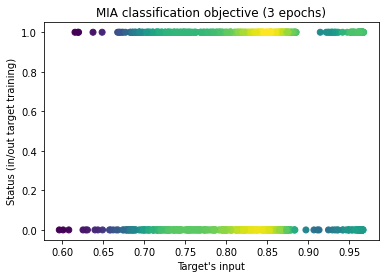

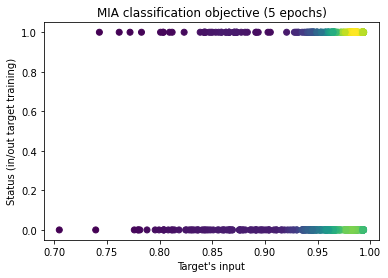

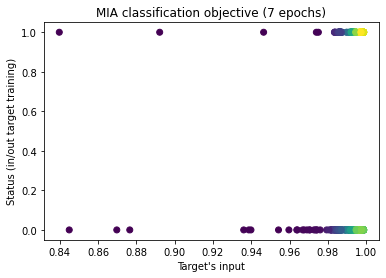

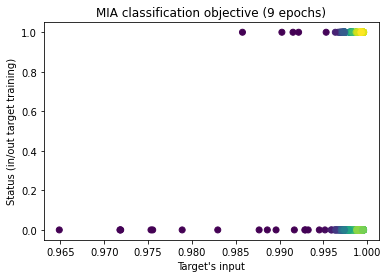

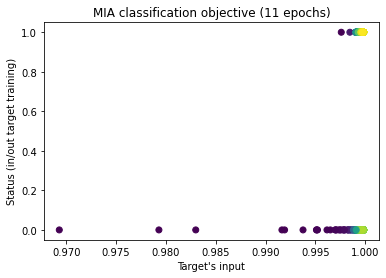

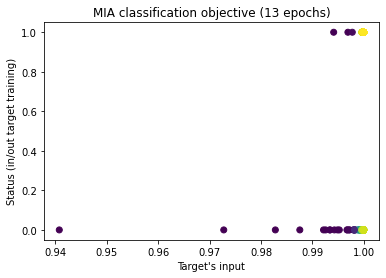

In [12]:
#score separability of target
utils.reload(mia)
mia.draw_separability(dataset,tokenizer,"target_model",epoch_bench,label_dicts,"prediction_score")

In [9]:
#add predictions of latest model
dataset = mia.get_shadow_dataset(dataset,tokenizer,target_dir,label_dicts)

  0%|          | 0/854 [00:00<?, ?ex/s]

Casting the dataset:   0%|          | 0/1 [00:00<?, ?ba/s]

Shadow acc  0.9321


06/22/2023 11:25:56:WARNING:No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


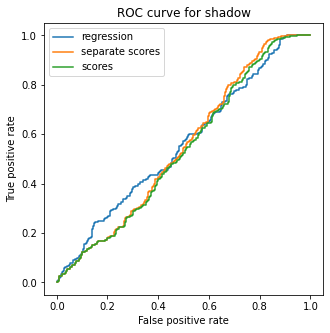

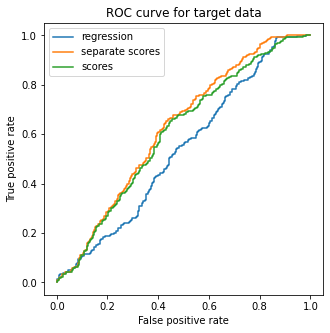

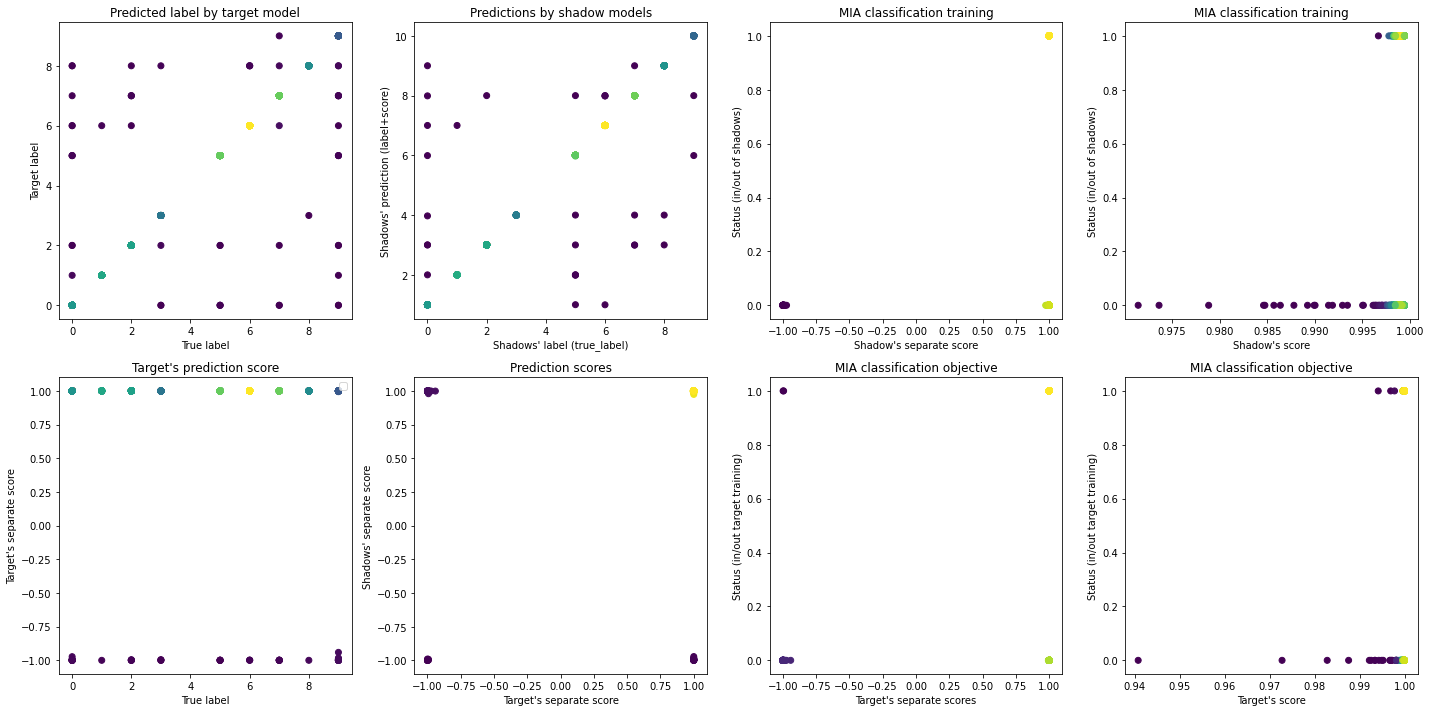

  0%|          | 0/854 [00:00<?, ?ex/s]

/home/gberthelier/.local/lib/python3.9/site-packages/xgboost/data.py:925: UserWarning: Unknown data type: <class 'float'>, trying to convert it to csr_matrix
  warnings.warn(


-----------------------
              precision    recall  f1-score   support

           0       0.95      0.13      0.23       424
           1       0.54      0.99      0.70       430

    accuracy                           0.56       854
   macro avg       0.74      0.56      0.46       854
weighted avg       0.74      0.56      0.46       854

-----------------------
% predicted in : 93 % (target:50%)


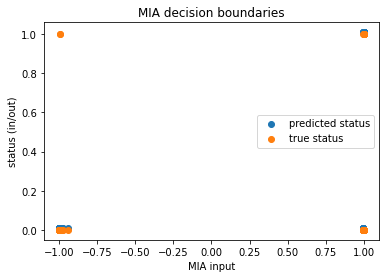

Accuracy on counterfactuals :  0.8


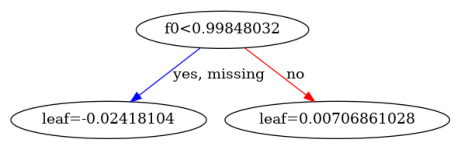

In [15]:
utils.reload(mia)
#shoadw model on separate scores
do_shadow_training = False
train_tests, xgb_model, X, y_train, dataset, acc, mem_acc = mia.mia_pipeline(tokenizer,dataset,seed,label_dicts,real_mems,sh_label_name="true_label",mia_label="separate_score",n_shadows=1,num_epochs=10,train_type="simple",pos_weight=2,do_shadows_training=do_shadow_training,shadow_dir="mia",build_mia=do_shadow_training,print_graphs=True,print_report=True)


Shadows


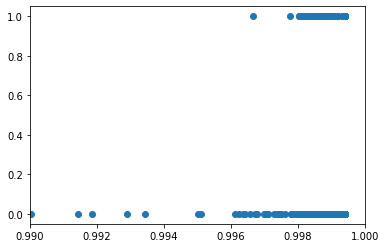

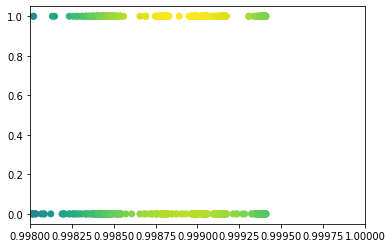

Tresholds : MIA accuracy
0.996  :  0.52
0.9965  :  0.52
0.997  :  0.53
0.9975  :  0.54
0.998  :  0.54
0.9985  :  0.53
0.9986  :  0.53
0.9987  :  0.53
0.999  :  0.51
0.9991  :  0.48
0.9992  :  0.48
0.9993  :  0.49
0.9994  :  0.5

Target


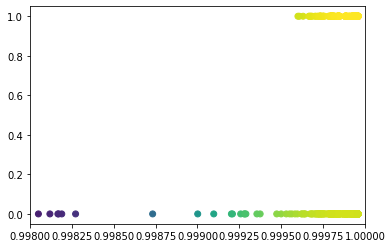

Tresholds : MIA accuracy
0.999  :  0.53
0.9995  :  0.54
0.9996  :  0.55
0.99965  :  0.55
0.9997  :  0.55
0.99975  :  0.55
0.9998  :  0.57
0.99985  :  0.58
0.9999  :  0.59
0.99991  :  0.59
0.99995  :  0.53
0.99999  :  0.5


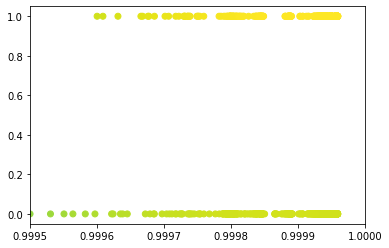

In [16]:
utils.reload(mia)
#separability of last epoch for shadow and target
mia.draw_last_separability("mia",dataset)

  0%|          | 0/854 [00:00<?, ?ex/s]

Casting the dataset:   0%|          | 0/1 [00:00<?, ?ba/s]

Shadow acc  0.9321


06/22/2023 11:26:06:WARNING:No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


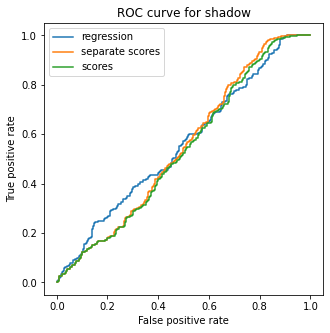

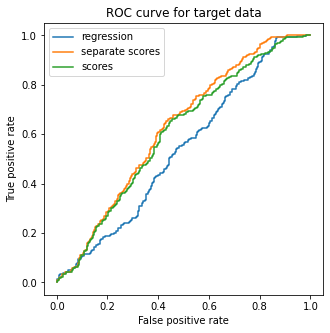

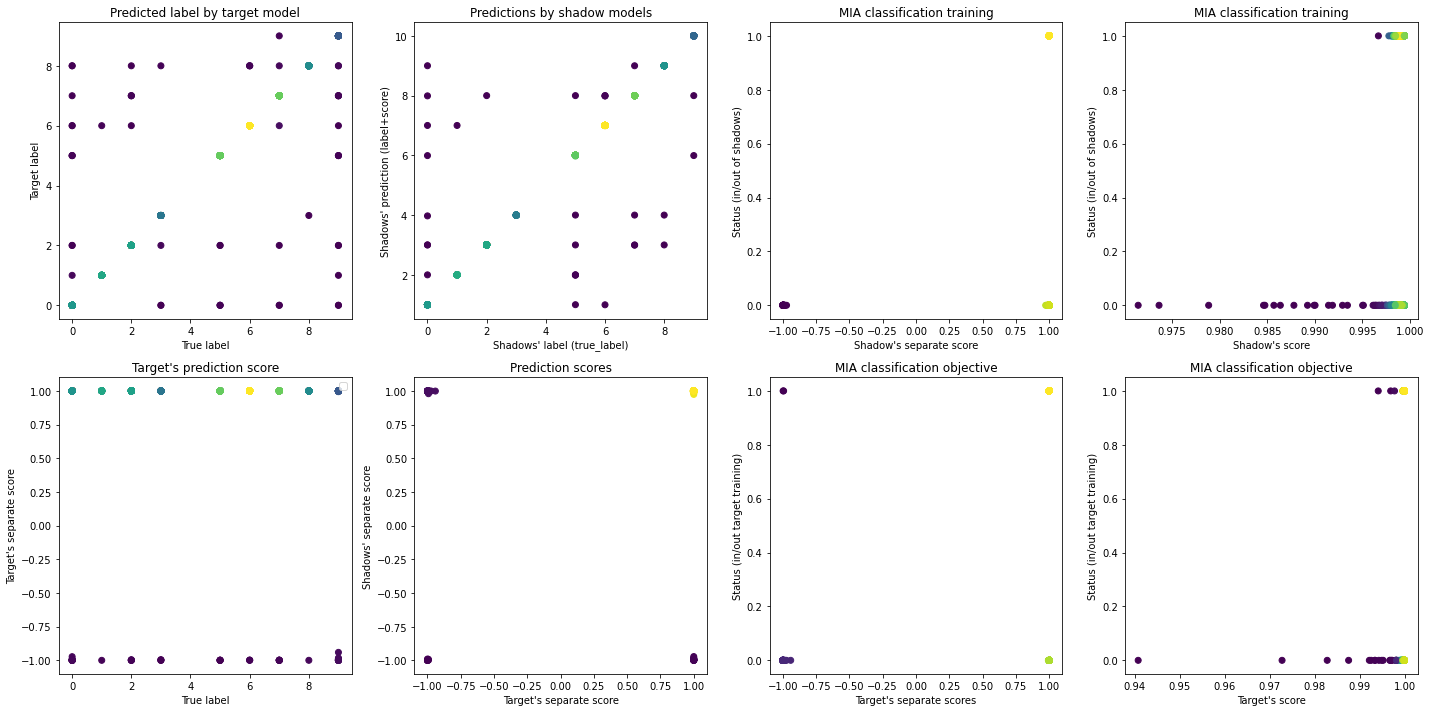

  0%|          | 0/854 [00:00<?, ?ex/s]

/home/gberthelier/.local/lib/python3.9/site-packages/xgboost/data.py:925: UserWarning: Unknown data type: <class 'float'>, trying to convert it to csr_matrix
  warnings.warn(


-----------------------
              precision    recall  f1-score   support

           0       0.70      0.26      0.38       424
           1       0.55      0.89      0.68       430

    accuracy                           0.58       854
   macro avg       0.62      0.57      0.53       854
weighted avg       0.62      0.58      0.53       854

-----------------------
% predicted in : 82 % (target:50%)


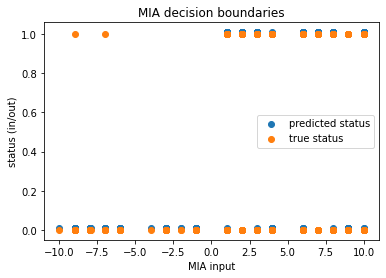

Accuracy on counterfactuals :  0.8


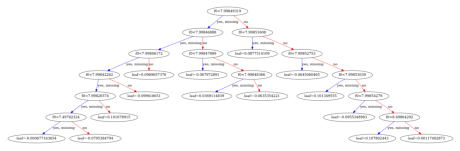

In [17]:
do_training = False
#mia with regression score
utils.reload(mia)
train_tests, xgb_model, X, y_train, dataset, acc, mem_acc = mia.mia_pipeline(tokenizer,dataset,seed,label_dicts,real_mems,sh_label_name="true_label",mia_label="regression",n_shadows=1,num_epochs=10,train_type="multi",pos_weight=2,do_shadows_training=do_training,shadow_dir="mia",build_mia=False,print_graphs=True,print_report=True)

In [35]:
utils.reload(mia)
acc = mia.target_mia("target_model/model_13",dataset,label_dicts,tokenizer,seed=seed,redo_dataset=False,mia_label="regression",pos_weight=0.66)
print("Target MIA acc : ",acc)

Target MIA acc :  0.6047


## Federated learning

In [119]:
utils.reload(fed)
fractions = [3/10,3/10,4/10]
dataset_list,accs_vanilla,local_accs,fed_accs = fed.fed_pipeline(dataset,fractions,label_dicts,train_vanilla=False,train_nodes_vanilla=False,do_train_fed=False,seed=seed,save_dir="fed",model_name="bert",node=node,site=site)

Building dataset
Datasets sizes :  [256, 256, 598]
Total size :  1110
--------------------
Done in 0.00 min
 

Global vanilla
Final vanilla accuracy :  0.8182
Training time : 100.56 min
Mean energy (W) :  213.4092
Total energy (kW) :  255.024


Local vanilla
Final vanilla accuracies :  [0.875, 0.9062, 0.9219]
Training times (min) : [73.26, 74.73, 74.33]
Mean energies (W) :  [215.2185, 215.9752, 215.8176]
Total energies (kW) :  [191.114, 191.786, 191.646]

Fed
Local accuracies for average model :  [0.875, 0.9375, 0.9375]
Training time :  143.03 min
Mean energy :  216.8653
Total energy :  371.924


## Differential privacy

Building dataset


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

--------------------
Done in 0.11 min
 
Current params : {'target_eps': None, 'max_grad_norm': 1, 'num_epochs': 10, 'batch_size': 32, 'learning_rate': 0.0005, 'noise': 0.1, 'delta_multiplier': 1, 'batch_divide': 1}

Vanilla
Final accuracy :  0.7708
Training time : 51.38 min
Mean energy :  212.6078
Total energy :  130.116

DP


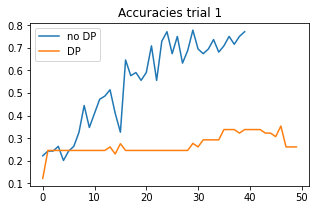

Acc :  0.2614
Eps :  682.0785
Training time : 56.54 min
Mean energy :  215.3958
Total energy :  144.746


In [19]:
utils.reload(dp)
params = {"target_eps":None,"max_grad_norm":1,"num_epochs":10,"batch_size":32,"learning_rate":5e-4,"noise":0.1,"delta_multiplier":1,"batch_divide":1}

accs_vanilla, accs_dp, eps_dp, train_dp, test_dp = dp.dp_pipeline(dataset,params,label_dicts,seed=seed,train_vanilla=False,do_train_dp=False,do_plot=True,save_dir="dp",n_logs=4,trial=1,model_name="bert",test_size=0.1,node=node,site=site)

## DP & MIA

In [107]:
utils.reload(dp)
if "label" not in dataset.column_names:
    dataset = dataset.rename_column("true_label","label")
simple_dataset, tokenizer_dp, new_label_dicts = dp.get_simple_dp(dataset,seed=seed,do_vanilla_training=False,do_dp_training=False)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/319 [00:00<?, ?ex/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Training size:  143


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Vanilla acc :  0.9792
DP acc :  0.5933
eps :  288.7245


In [112]:
utils.reload(mia)
mia.dp_mia(simple_dataset,tokenizer_dp,new_label_dicts,seed=seed,pos_weight=0.9,mia_label="regression",test_size=0.1)

-------
Vanilla model


  0%|          | 0/286 [00:00<?, ?ex/s]

MIA train size :  257
MIA eval size :  29
Vanilla MIA accuracy:  0.5862

-------
DP model


  0%|          | 0/286 [00:00<?, ?ex/s]

MIA train size :  257
MIA eval size :  29
DP MIA accuracy:  0.5517


## FL & MIA

In [120]:
utils.reload(mia)
mia.fed_mia(dataset,dataset_list,tokenizer_dp,label_dicts,pos_weight=0.9,mia_label="regression",seed=seed,test_size=0.1)

Building datasets


  0%|          | 0/26 [00:00<?, ?ex/s]

  0%|          | 0/26 [00:00<?, ?ex/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Node 0 MIA 'in' size  26


  0%|          | 0/26 [00:00<?, ?ex/s]

  0%|          | 0/26 [00:00<?, ?ex/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Node 1 MIA 'in' size  26


  0%|          | 0/60 [00:00<?, ?ex/s]

  0%|          | 0/60 [00:00<?, ?ex/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Node 2 MIA 'in' size  60


  0%|          | 0/86 [00:00<?, ?ex/s]

  0%|          | 0/86 [00:00<?, ?ex/s]


-------------
Global vanilla


  0%|          | 0/172 [00:00<?, ?ex/s]

MIA train size :  154
MIA eval size :  18


'too low acc'

## Hyperparameters


-------------
Model : bert, include_mem: True

Fecthing dataset
Building dataset


  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/854 [00:00<?, ?ex/s]

Flattening the indices:   0%|          | 0/1 [00:00<?, ?ba/s]

Number of counterfactuals :  15


  0%|          | 0/1 [00:00<?, ?ba/s]

Training dataset size :  432

Retrieving target

MIA


  0%|          | 0/854 [00:00<?, ?ex/s]

mia acc :  0.5698

-------------
Model : bert, include_mem: False

Fecthing dataset
Building dataset


  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/854 [00:00<?, ?ex/s]

Flattening the indices:   0%|          | 0/1 [00:00<?, ?ba/s]

Removed 15 counterfactuals


  0%|          | 0/1 [00:00<?, ?ba/s]

Training dataset size :  417

Training target


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Loaded epoch size : 1
Loaded epoch size : 5
Loaded epoch size : 9

MIA


  0%|          | 0/854 [00:00<?, ?ex/s]

mia acc :  0.5116

-------------
Model : distilbert, include_mem: True

Fecthing dataset
Building dataset


  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/854 [00:00<?, ?ex/s]

Flattening the indices:   0%|          | 0/1 [00:00<?, ?ba/s]

Number of counterfactuals :  16


  0%|          | 0/1 [00:00<?, ?ba/s]

Training dataset size :  433

Training target


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Loaded epoch size : 1
Loaded epoch size : 5
Loaded epoch size : 9

MIA


  0%|          | 0/854 [00:00<?, ?ex/s]

mia acc :  0.5349

-------------
Model : distilbert, include_mem: False

Fecthing dataset
Building dataset


  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/854 [00:00<?, ?ex/s]

Flattening the indices:   0%|          | 0/1 [00:00<?, ?ba/s]

Removed 16 counterfactuals


  0%|          | 0/1 [00:00<?, ?ba/s]

Training dataset size :  417

Training target


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Loaded epoch size : 1
Loaded epoch size : 5
Loaded epoch size : 9

MIA


  0%|          | 0/854 [00:00<?, ?ex/s]

mia acc :  0.593


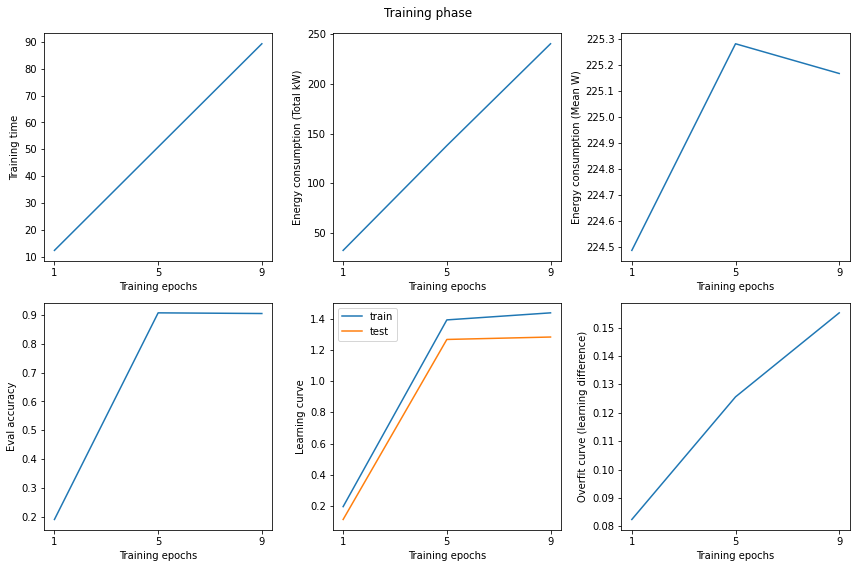

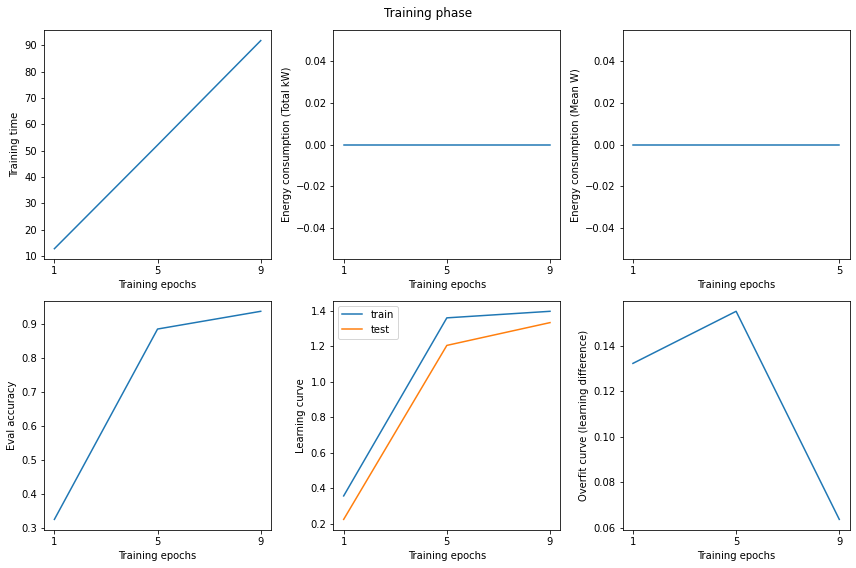

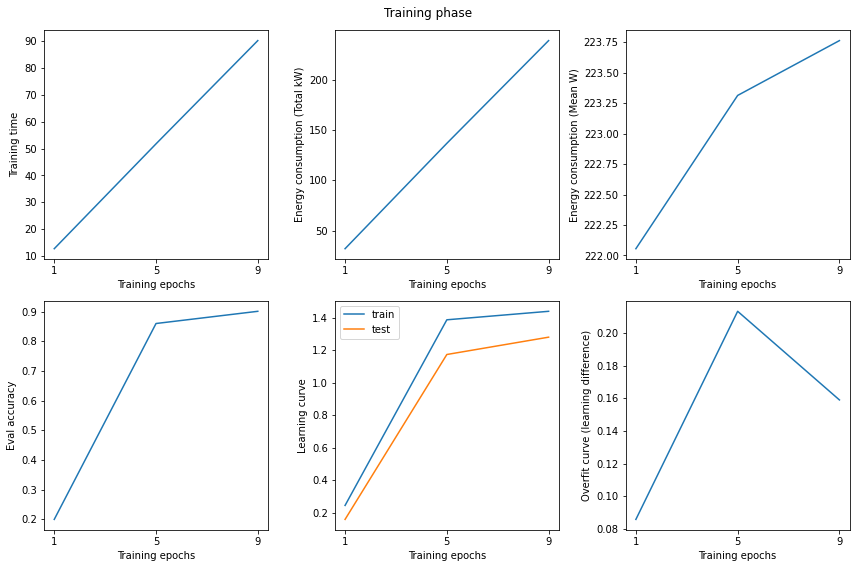

In [5]:
utils.reload(training)
utils.reload(mia)
utils.reload(utils)
utils.reload(hoc)

start_at_dict = {"bert":[3,3],"distilbert":[3,3]}
compute_mem_dict = {"bert":False,"distilbert":False}

epoch_bench = [1,5,9]
for model_name in ["bert","distilbert"]:
    for include_mem in [True,False]:
        print("")
        print("-------------")
        print(f"Model : {model_name}, include_mem: {include_mem}")

        print("")
        print("Fecthing dataset")
        if model_name=="bert":
            dataset, real_mems, tokenizer, label_dicts = hoc.get_all_hoc(seed=seed,real_t=0.2,print_graphs=False,model_name=model_name,include_mem=include_mem,compute_mem=False,mem_dir=f"mem")
        else:
            dataset, real_mems, tokenizer, label_dicts = hoc.get_all_hoc(seed=seed,real_t=0.2,print_graphs=False,model_name=model_name,include_mem=include_mem,compute_mem=compute_mem_dict[model_name],mem_dir=f"hyper/{model_name}_True/mem")
        if include_mem:
                print("Number of counterfactuals : ",len(real_mems))
        else:
            print(f"Removed {len(real_mems)} counterfactuals")
        print("Training dataset size : ",dataset.filter(lambda data: data["status"]==1).num_rows)

        print("")
        if model_name=="bert" and include_mem:
            print("Retrieving target")
            target_dir = f"target_model/model_{epoch_bench[-1]}"
        else:
            print("Training target")
            training.train_grid(dataset.filter(lambda data: data["status"]==1),dataset.filter(lambda data: data["status"]==0),tokenizer,epoch_bench,label_dicts,target_dir=f"hyper/{model_name}_{include_mem}",seed=seed,compute=True,print_graphs=True,start_at=start_at_dict[model_name][1-int(include_mem)],node=node,site=site)
            target_dir = f"hyper/{model_name}_{include_mem}/model_{epoch_bench[-1]}"

        print("")
        print("MIA")
        acc = mia.target_mia(target_dir,dataset,label_dicts,tokenizer,seed=seed,redo_dataset=True,mia_label="regression",pos_weight=0.9)
        print("mia acc : ",acc)